## Used Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Lasso, LinearRegression
import math
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV

In [2]:
#Reading the data
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
train_data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
#Removing the unnecessaries columns
train_data.drop(["id","Unnamed: 0"], axis=1, inplace=True)
test_data.drop(["id","Unnamed: 0"], axis=1, inplace=True)

In [5]:
train_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


## Data Preparation

In [6]:
#Changing target values
train_data["satisfaction"] = train_data["satisfaction"].replace({"neutral or dissatisfied": 0, "satisfied": 1})
test_data["satisfaction"] = test_data["satisfaction"].replace({"neutral or dissatisfied": 0, "satisfied": 1})

In [7]:
train_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [8]:
#Encoding the categorical columns
train_data = pd.get_dummies(train_data, columns= ["Gender", "Customer Type", "Type of Travel", "Class"])
test_data = pd.get_dummies(test_data, columns=  ["Gender", "Customer Type", "Type of Travel", "Class"])

In [9]:
train_data.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,...,0,0,1,1,0,0,1,0,0,1
1,25,235,3,2,3,3,1,3,1,1,...,0,0,1,0,1,1,0,1,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,1,1,0,1,0,1,0,1,0,0
3,25,562,2,5,5,5,2,2,2,2,...,0,1,0,1,0,1,0,1,0,0
4,61,214,3,3,3,3,4,5,5,3,...,1,0,1,1,0,1,0,1,0,0


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 28 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Age                                103904 non-null  int64  
 1   Flight Distance                    103904 non-null  int64  
 2   Inflight wifi service              103904 non-null  int64  
 3   Departure/Arrival time convenient  103904 non-null  int64  
 4   Ease of Online booking             103904 non-null  int64  
 5   Gate location                      103904 non-null  int64  
 6   Food and drink                     103904 non-null  int64  
 7   Online boarding                    103904 non-null  int64  
 8   Seat comfort                       103904 non-null  int64  
 9   Inflight entertainment             103904 non-null  int64  
 10  On-board service                   103904 non-null  int64  
 11  Leg room service                   1039

In [11]:
#Filling the missing values
train_data["Arrival Delay in Minutes"].fillna(train_data["Arrival Delay in Minutes"].mean(), inplace = True)
test_data["Arrival Delay in Minutes"].fillna(test_data["Arrival Delay in Minutes"].mean(), inplace = True)

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 28 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Age                                103904 non-null  int64  
 1   Flight Distance                    103904 non-null  int64  
 2   Inflight wifi service              103904 non-null  int64  
 3   Departure/Arrival time convenient  103904 non-null  int64  
 4   Ease of Online booking             103904 non-null  int64  
 5   Gate location                      103904 non-null  int64  
 6   Food and drink                     103904 non-null  int64  
 7   Online boarding                    103904 non-null  int64  
 8   Seat comfort                       103904 non-null  int64  
 9   Inflight entertainment             103904 non-null  int64  
 10  On-board service                   103904 non-null  int64  
 11  Leg room service                   1039

<AxesSubplot:>

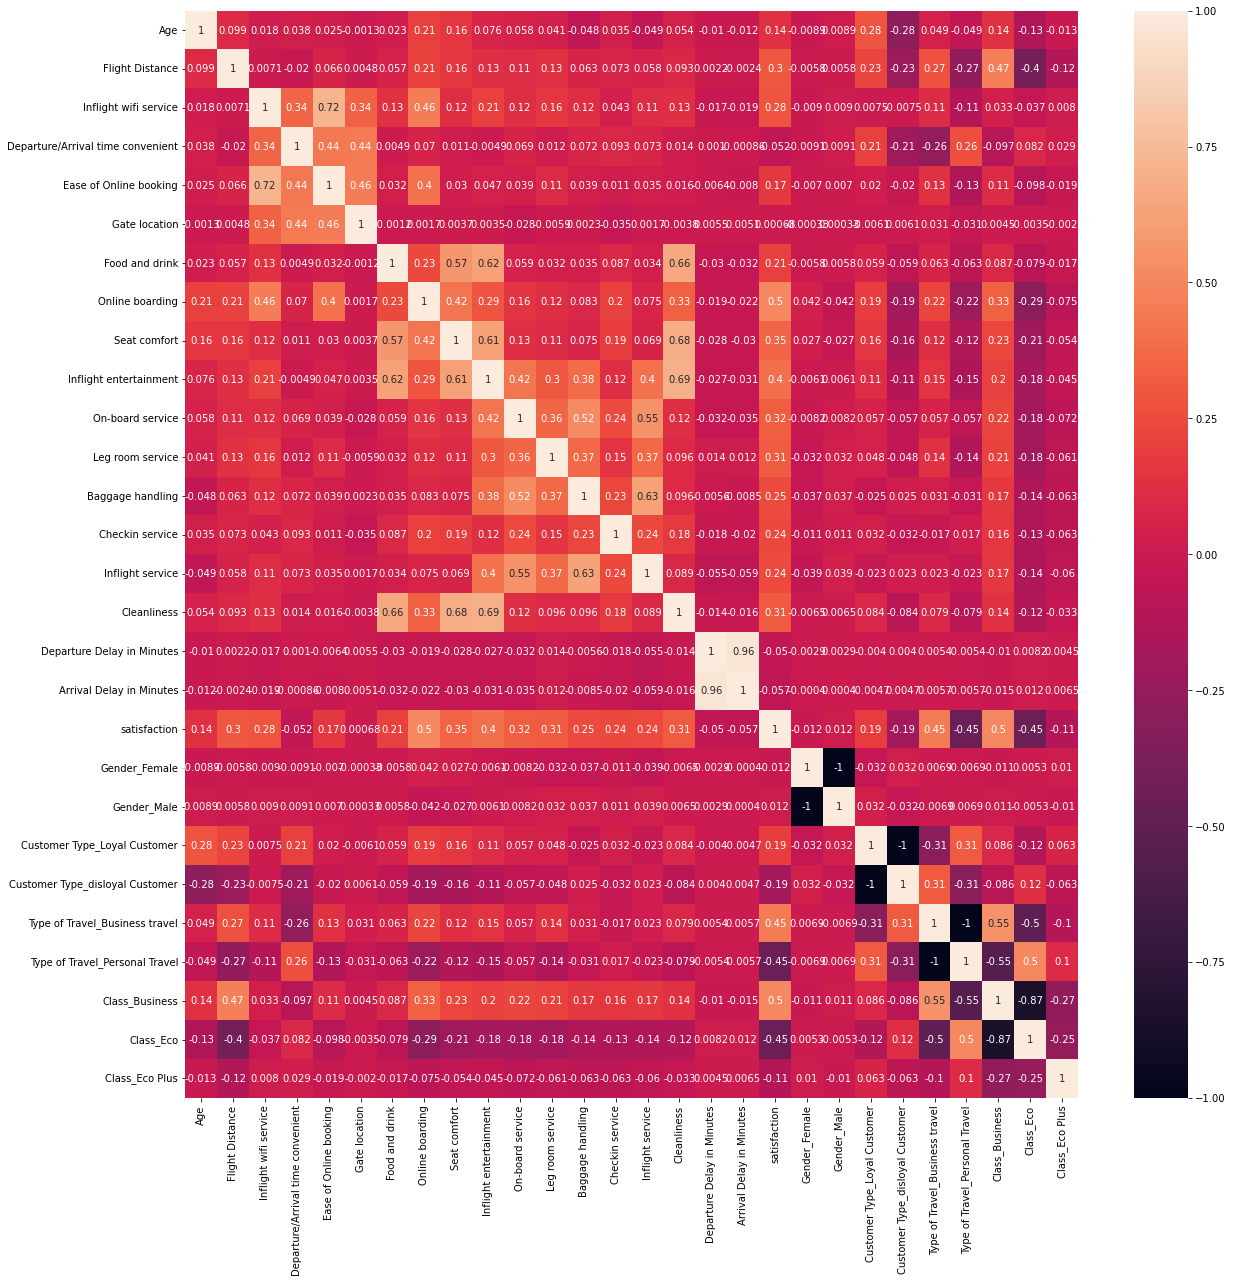

In [13]:
#Checking the correlation
plt.figure(figsize=(20,20))
sns.heatmap(train_data.corr(),annot=True)

In [14]:
#Adding a new feature
train_data["Total Delay in Minutes"] = train_data["Departure Delay in Minutes"] + train_data["Arrival Delay in Minutes"]

To reduce multicollinearity, a new feature was created by summing two highly correlated features together.

In [15]:
#Splitting the data
X_train = train_data.drop(["satisfaction","Departure Delay in Minutes","Arrival Delay in Minutes"], axis=1)
y_train = train_data["satisfaction"]

X_test = test_data.drop(["satisfaction","Departure Delay in Minutes","Arrival Delay in Minutes"], axis=1)
y_test = test_data["satisfaction"]

## Feature Selection

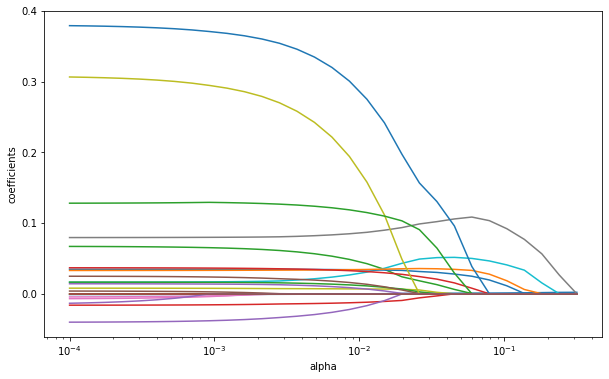

In [16]:
alphas = np.logspace(-4, -0.5, 30)

coefs = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=100000).fit(X_train, y_train)
    coefs.append(lasso.coef_)

plt.figure(figsize=(10, 6))
plt.plot(alphas, coefs)
plt.xlabel("alpha")
plt.ylabel("coefficients")
plt.xscale("log")
plt.show()

Based on the plot, it appears that the coefficients of the features become relatively stable and approach zero at an alpha value of around 0.0001. Therefore, I have chosen an alpha value of 0.0001 for Lasso regression.

In [17]:
lasso = Lasso(alpha = 0.0001, max_iter = 100000).fit(X_train, y_train)

selector = SelectFromModel(lasso, max_features=10)

X_ = selector.fit_transform(X_train, y_train)

selected_features = list(X_train.columns[selector.get_support(indices=True)])

selected_features

['Inflight wifi service',
 'Ease of Online booking',
 'Online boarding',
 'On-board service',
 'Leg room service',
 'Checkin service',
 'Cleanliness',
 'Customer Type_Loyal Customer',
 'Type of Travel_Business travel',
 'Class_Business']

In [18]:
X_train = train_data[selected_features]
y_train = train_data["satisfaction"]

X_test = test_data[selected_features]
y_test = test_data["satisfaction"]

In [19]:
#Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Modeling and Cross Validation 

In [20]:
def model(X_train, y_train, X_test, y_test):
    
    lr = LogisticRegression()
    dt = DecisionTreeClassifier()
    knn = KNeighborsClassifier()
    gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
    bag = BaggingClassifier(base_estimator=dt, n_estimators=100, random_state=42)
    
    models = {"Logistic Regression": lr, "Decision Tree": dt, "KNN": knn, 
              "Gradient Boosting": gb,"Bagging Classifier": bag}
    
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred_test = model.predict(X_test)
        y_pred_prob = model.predict_proba(X_test)[:,1]
        results[name] = {
            "AUC Score": roc_auc_score(y_test, y_pred_test),
            "AUC Score Prob": roc_auc_score(y_test, y_pred_prob),
            "F1 Score": f1_score(y_test, y_pred_test),
        }
        
    for name, metrics in results.items():
        print("Model: {}".format(name))
        for metric_name, metric_value in metrics.items():
            print("{}: {}".format(metric_name, metric_value))
        print()
    best_models = {}
    for metric_name in ["AUC Score", "F1 Score","AUC Score Prob"]:
        best_models[metric_name] = max(results, key=lambda x: results[x][metric_name])
    
    cv_mean_auc = {}
    cv_mean_f1 = {}
    for name, model in models.items():
        scores_auc = cross_val_score(model, X_train, y_train, cv=10, scoring="roc_auc")
        cv_mean_auc[name] = scores_auc.mean()
        
    for name, model in models.items():
        scores_f1 = cross_val_score(model, X_train, y_train, cv=10, scoring="f1")
        cv_mean_f1[name] = scores_f1.mean()
        
    return best_models, cv_mean_auc, cv_mean_f1, results

In [21]:
#Choosing the best model
best_models, cv_mean_auc, cv_mean_f1, results = model(X_train, y_train, X_test, y_test)
print("Best models based on each metric: {}".format(best_models))

Model: Logistic Regression
AUC Score: 0.8640929044598815
AUC Score Prob: 0.9225368117266136
F1 Score: 0.8468734613490893

Model: Decision Tree
AUC Score: 0.9378233286617178
AUC Score Prob: 0.963095019802478
F1 Score: 0.9308829404714343

Model: KNN
AUC Score: 0.9323823206899189
AUC Score Prob: 0.9730117003294563
F1 Score: 0.9249799053317853

Model: Gradient Boosting
AUC Score: 0.9323768957161598
AUC Score Prob: 0.9847734135293092
F1 Score: 0.9247876173108571

Model: Bagging Classifier
AUC Score: 0.9412550081940573
AUC Score Prob: 0.9846733870026018
F1 Score: 0.9345174973488867

Best models based on each metric: {'AUC Score': 'Bagging Classifier', 'F1 Score': 'Bagging Classifier', 'AUC Score Prob': 'Gradient Boosting'}


After comparing the performance of five models with default parameters, it was observed that the Gradient Boosting and Bagging Classifier models had a higher score than the other models.

In [22]:
sorted_models_auc = sorted(cv_mean_auc.items(), key=lambda x: x[1], reverse=True)
print("Cross Validation Mean (AUC)")
for model, score in sorted_models_auc:
    print(f"{model}: {score}")
    
print()    

sorted_models_f1 = sorted(cv_mean_f1.items(), key=lambda x: x[1], reverse=True)
print("Cross Validation Mean (F1)")
for model, score in sorted_models_f1:
    print(f"{model}: {score}")

Cross Validation Mean (AUC)
Gradient Boosting: 0.9844724114570207
Bagging Classifier: 0.9840696951081593
KNN: 0.9715335458908058
Decision Tree: 0.9591545454978687
Logistic Regression: 0.9243943625188151

Cross Validation Mean (F1)
Bagging Classifier: 0.9321423122426232
Decision Tree: 0.9278720976488861
Gradient Boosting: 0.923238197202329
KNN: 0.9221487568244069
Logistic Regression: 0.848692816666879


However, after implementing cross-validation and calculating the mean score, it was found that the Gradient Boosting had the highest mean cross-validation AUC score among the five models.

## Hyperparameter Tuning

In [32]:
param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 1],
    "max_depth": [3, 5, 7]
}

gb = GradientBoostingClassifier(random_state=42)
gb_cv_auc = GridSearchCV(gb, param_grid, cv=5, scoring="roc_auc")
gb_cv_f1 = GridSearchCV(gb, param_grid, cv=5, scoring="f1")

gb_cv_auc.fit(X_train, y_train)
gb_cv_f1.fit(X_train, y_train)

print("Gradient Boosting")
print("Best parameters of AUC:", gb_cv_auc.best_params_)
print("Best score of AUC:", gb_cv_auc.best_score_)
print()
print("Best parameters of F1:", gb_cv_f1.best_params_)
print("Best score of F1:", gb_cv_f1.best_score_)

Gradient Boosting
Best parameters of AUC: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Best score of AUC: 0.9904850326375044

Best parameters of F1: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best score of F1: 0.9407243127264872


In [33]:
param_grid = {
    "n_estimators": [10, 50, 100],
    "max_samples": [0.5, 1.0],
    "max_features": [0.5, 1.0],
}

bag = BaggingClassifier(base_estimator=DecisionTreeClassifier())

bag_cv_auc = GridSearchCV(bag, param_grid, scoring="roc_auc", cv=5 ,n_jobs=-1)
bag_cv_f1 = GridSearchCV(bag, param_grid, scoring="f1", cv=5 ,n_jobs=-1)

bag_cv_auc.fit(X_train, y_train)
bag_cv_f1.fit(X_train, y_train)

print("Bagging Classifier")
print("Best parameters of AUC: ", bag_cv_auc.best_params_)
print("Best score of AUC: ", bag_cv_auc.best_score_)
print()
print("Best parameters of F1: ", bag_cv_f1.best_params_)
print("Best score of F1: ", bag_cv_f1.best_score_)

Bagging Classifier
Best parameters of AUC:  {'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 100}
Best score of AUC:  0.986851033768728

Best parameters of F1:  {'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 100}
Best score of F1:  0.9339172051905367


In [34]:
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 7],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

dt = DecisionTreeClassifier()

dt_cv_auc = GridSearchCV(dt, param_grid, scoring="roc_auc", cv=5, n_jobs=-1)
dt_cv_f1 = GridSearchCV(dt, param_grid, scoring="f1", cv=5, n_jobs=-1)

dt_cv_auc.fit(X_train, y_train)
dt_cv_f1.fit(X_train, y_train)

print("Decision Tree")
print("Best parameters of AUC: ", dt_cv_auc.best_params_)
print("Best score of AUC: ", dt_cv_auc.best_score_)
print()
print("Best parameters of F1: ", dt_cv_f1.best_params_)
print("Best score of F1: ", dt_cv_f1.best_score_)

Decision Tree
Best parameters of AUC:  {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best score of AUC:  0.9810279790193945

Best parameters of F1:  {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score of F1:  0.9162907878271852


In [35]:
param_grid = {
    "n_neighbors": [3, 5, 7, 9],
    "weights": ["uniform", "distance"],
    "p": [1, 2],
}

knn = KNeighborsClassifier()

knn_cv_auc = GridSearchCV(knn, param_grid, scoring="roc_auc", cv=5, n_jobs=-1)
knn_cv_f1 = GridSearchCV(knn, param_grid, scoring="f1", cv=5, n_jobs=-1)

knn_cv_auc.fit(X_train, y_train)
knn_cv_f1.fit(X_train, y_train)

print("KNN")
print("Best parameters of AUC: ", knn_cv_auc.best_params_)
print("Best score of AUC: ", knn_cv_auc.best_score_)
print()
print("Best parameters of F1: ", knn_cv_f1.best_params_)
print("Best score of F1: ", knn_cv_f1.best_score_)

KNN
Best parameters of AUC:  {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Best score of AUC:  0.9786741774565654

Best parameters of F1:  {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Best score of F1:  0.9257397601947053


In [36]:
param_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear", "saga"],
}

lr = LogisticRegression()

lr_cv_auc = GridSearchCV(lr, param_grid, scoring="roc_auc", cv=5, n_jobs=-1)
lr_cv_f1 = GridSearchCV(lr, param_grid, scoring="f1", cv=5, n_jobs=-1)

lr_cv_auc.fit(X_train, y_train)
lr_cv_f1.fit(X_train, y_train)

print("Logistic Regression")
print("Best parameters of AUC: ", lr_cv_auc.best_params_)
print("Best score of AUC: ", lr_cv_auc.best_score_)
print()
print("Best parameters of F1: ", lr_cv_f1.best_params_)
print("Best score of F1: ", lr_cv_f1.best_score_)

Logistic Regression
Best parameters of AUC:  {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}
Best score of AUC:  0.9244408208206367

Best parameters of F1:  {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Best score of F1:  0.8491079200483668


In [37]:
print("Gradient Boosting")
print("Base AUC vs Grid Search {:0.2f}%.".format( 100 * (gb_cv_auc.best_score_ - results["Gradient Boosting"]["AUC Score"]) / results["Gradient Boosting"]["AUC Score"]))
print("Base F1 vs Grid Search {:0.2f}%.".format( 100 * (gb_cv_f1.best_score_ - results["Gradient Boosting"]["F1 Score"]) / results["Gradient Boosting"]["F1 Score"]))
print()
print("Bagging Classifier")
print("Base AUC vs Grid Search {:0.2f}%.".format( 100 * (bag_cv_auc.best_score_ - results["Bagging Classifier"]["AUC Score"]) / results["Bagging Classifier"]["AUC Score"]))
print("Base F1 vs Grid Search {:0.2f}%.".format( 100 * (bag_cv_f1.best_score_ - results["Bagging Classifier"]["F1 Score"]) / results["Bagging Classifier"]["F1 Score"]))
print()
print("Decision Tree")
print("Base AUC vs Grid Search {:0.2f}%.".format( 100 * (dt_cv_auc.best_score_ - results["Decision Tree"]["AUC Score"]) / results["Decision Tree"]["AUC Score"]))
print("Base F1 vs Grid Search {:0.2f}%.".format( 100 * (dt_cv_f1.best_score_ - results["Decision Tree"]["F1 Score"]) / results["Decision Tree"]["F1 Score"]))
print()
print("KNN")
print("Base AUC vs Grid Search {:0.2f}%.".format( 100 * (knn_cv_auc.best_score_ - results["KNN"]["AUC Score"]) / results["KNN"]["AUC Score"]))
print("Base F1 vs Grid Search {:0.2f}%.".format( 100 * (knn_cv_f1.best_score_ - results["KNN"]["F1 Score"]) / results["KNN"]["F1 Score"]))
print()
print("Logistic Regression")
print("Base AUC vs Grid Search {:0.2f}%.".format( 100 * (lr_cv_auc.best_score_ - results["Logistic Regression"]["AUC Score"]) / results["Logistic Regression"]["AUC Score"]))
print("Base F1 vs Grid Search {:0.2f}%.".format( 100 * (lr_cv_f1.best_score_ - results["Logistic Regression"]["F1 Score"]) / results["Logistic Regression"]["F1 Score"]))
print()

Gradient Boosting
Base AUC vs Grid Search 6.23%.
Base F1 vs Grid Search 1.72%.

Bagging Classifier
Base AUC vs Grid Search 4.84%.
Base F1 vs Grid Search -0.06%.

Decision Tree
Base AUC vs Grid Search 4.61%.
Base F1 vs Grid Search -1.57%.

KNN
Base AUC vs Grid Search 4.96%.
Base F1 vs Grid Search 0.08%.

Logistic Regression
Base AUC vs Grid Search 6.98%.
Base F1 vs Grid Search 0.26%.



Based on the results of the hyperparameter tuning for 5 models, it appears that Gradient Boosting has a higher improvement percentage in terms of AUC (6.23%) and F1 (1.72%) compared to Bagging Classifier's AUC improvement percentage (4.84%) and F1 decrease (-0.06%).

These results suggest that Gradient Boosting is a better model than Bagging Classifier after hyperparameter tuning, as it has a higher improvement percentage in both metrics. Therefore, we can conclude that Gradient Boosting is the best model among the two for the given dataset and problem.